In [13]:
### Simulation of Mass-Spring-Damper System ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import Simulator as sim

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from random import randint


In [14]:
### Creating dataset from data points ###

c = 4   # Damping constant
k = 2   # Stiffness of the spring
m = 20  # Mass
F = 5   # Force


vals = sim.generate(c,k,m,F) ## Generating the training data with separate module ##


list_t = list(zip(vals[0], vals[1], vals[2]))
dframe = pd.DataFrame(list_t, columns=['Time',"Speed", 'Position']) ##Creating Pandas DF from data ##

print (dframe)

Y = dframe["Position"].iloc[1:] ## Deleting first row so predictions are k+1 ##
X = dframe.head(-1)


         Time     Speed  Position
0     0.00000  0.000000  0.000000
1     0.06006  0.014924  0.000449
2     0.12012  0.029665  0.001789
3     0.18018  0.044219  0.004009
4     0.24024  0.058584  0.007097
..        ...       ...       ...
995  59.75976 -0.001677  2.497899
996  59.81982 -0.001644  2.497799
997  59.87988 -0.001611  2.497701
998  59.93994 -0.001577  2.497606
999  60.00000 -0.001544  2.497512

[1000 rows x 3 columns]


In [15]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [16]:

### CREATING NN MODEL ###

model=Sequential([Dense(3,input_shape=(3,), activation="relu"),
                  Dense(4,activation="relu"),
                  Dense(4,activation="relu"),
                  Dense(1)])

model.compile(Adam(lr=0.001),loss=custom_loss)

In [17]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=1000, callbacks= [keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/1000
999/999 [==============================] - 0s 222us/step - loss: 436.5266
Epoch 2/1000
999/999 [==============================] - 0s 104us/step - loss: 294.3792
Epoch 3/1000
480/999 [=============>................] - ETA: 0s - loss: 211.6146

C:\Users\juhop\anaconda3\envs\bach\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


999/999 [==============================] - 0s 105us/step - loss: 196.8588
Epoch 4/1000
999/999 [==============================] - 0s 99us/step - loss: 131.5151
Epoch 5/1000
999/999 [==============================] - 0s 101us/step - loss: 86.4550
Epoch 6/1000
999/999 [==============================] - 0s 98us/step - loss: 54.9573
Epoch 7/1000
999/999 [==============================] - 0s 93us/step - loss: 28.6012
Epoch 8/1000
999/999 [==============================] - 0s 100us/step - loss: 2.1265
Epoch 9/1000
999/999 [==============================] - 0s 100us/step - loss: 1.0525
Epoch 10/1000
999/999 [==============================] - 0s 131us/step - loss: 0.9630
Epoch 11/1000
999/999 [==============================] - 0s 152us/step - loss: 0.9209
Epoch 12/1000
999/999 [==============================] - 0s 146us/step - loss: 0.8824
Epoch 13/1000
999/999 [==============================] - ETA: 0s - loss: 0.819 - 0s 150us/step - loss: 0.8458
Epoch 14/1000
999/999 [=======================

999/999 [==============================] - 0s 151us/step - loss: 0.0283
Epoch 99/1000
999/999 [==============================] - 0s 151us/step - loss: 0.0282
Epoch 100/1000
999/999 [==============================] - 0s 150us/step - loss: 0.0283
Epoch 101/1000
999/999 [==============================] - 0s 152us/step - loss: 0.0282
Epoch 102/1000
999/999 [==============================] - 0s 155us/step - loss: 0.0283
Epoch 103/1000
999/999 [==============================] - 0s 149us/step - loss: 0.0280
Epoch 104/1000
999/999 [==============================] - 0s 145us/step - loss: 0.0281
Epoch 105/1000
999/999 [==============================] - 0s 150us/step - loss: 0.0279
Epoch 106/1000
999/999 [==============================] - 0s 150us/step - loss: 0.0279
Epoch 107/1000
999/999 [==============================] - 0s 151us/step - loss: 0.0277
Epoch 108/1000
999/999 [==============================] - 0s 155us/step - loss: 0.0282
Epoch 109/1000
999/999 [==============================] - 0

999/999 [==============================] - 0s 151us/step - loss: 0.0196
Epoch 193/1000
999/999 [==============================] - 0s 152us/step - loss: 0.0194
Epoch 194/1000
999/999 [==============================] - 0s 147us/step - loss: 0.0192
Epoch 195/1000
999/999 [==============================] - 0s 147us/step - loss: 0.0196
Epoch 196/1000
999/999 [==============================] - 0s 148us/step - loss: 0.0191
Epoch 197/1000
999/999 [==============================] - 0s 148us/step - loss: 0.0191
Epoch 198/1000
999/999 [==============================] - 0s 147us/step - loss: 0.0189
Epoch 199/1000
999/999 [==============================] - 0s 146us/step - loss: 0.0189
Epoch 200/1000
999/999 [==============================] - 0s 146us/step - loss: 0.0184
Epoch 201/1000
999/999 [==============================] - 0s 151us/step - loss: 0.0189
Epoch 202/1000
999/999 [==============================] - 0s 151us/step - loss: 0.0182
Epoch 203/1000
999/999 [==============================] - 

999/999 [==============================] - 0s 151us/step - loss: 0.0076
Epoch 287/1000
999/999 [==============================] - 0s 151us/step - loss: 0.0078
Epoch 288/1000
999/999 [==============================] - 0s 150us/step - loss: 0.0075
Epoch 289/1000
999/999 [==============================] - 0s 147us/step - loss: 0.0080
Epoch 290/1000
999/999 [==============================] - 0s 153us/step - loss: 0.0073
Epoch 291/1000
999/999 [==============================] - 0s 152us/step - loss: 0.0073
Epoch 292/1000
999/999 [==============================] - 0s 152us/step - loss: 0.0076
Epoch 293/1000
999/999 [==============================] - 0s 155us/step - loss: 0.0070
Epoch 294/1000
999/999 [==============================] - 0s 154us/step - loss: 0.0068
Epoch 295/1000
999/999 [==============================] - 0s 154us/step - loss: 0.0069
Epoch 296/1000
999/999 [==============================] - 0s 153us/step - loss: 0.0068
Epoch 297/1000
999/999 [==============================] - 

999/999 [==============================] - 0s 149us/step - loss: 0.0016
Epoch 381/1000
999/999 [==============================] - 0s 145us/step - loss: 0.0015
Epoch 382/1000
999/999 [==============================] - 0s 152us/step - loss: 0.0016
Epoch 383/1000
999/999 [==============================] - 0s 147us/step - loss: 0.0015
Epoch 384/1000
999/999 [==============================] - 0s 147us/step - loss: 0.0015
Epoch 385/1000
999/999 [==============================] - 0s 149us/step - loss: 0.0014
Epoch 386/1000
999/999 [==============================] - 0s 148us/step - loss: 0.0015
Epoch 387/1000
999/999 [==============================] - 0s 152us/step - loss: 0.0015
Epoch 388/1000
999/999 [==============================] - 0s 148us/step - loss: 0.0014
Epoch 389/1000
999/999 [==============================] - 0s 148us/step - loss: 0.0015
Epoch 390/1000
999/999 [==============================] - 0s 148us/step - loss: 0.0013
Epoch 391/1000
999/999 [==============================] - 

999/999 [==============================] - 0s 149us/step - loss: 1.8235e-05
Epoch 472/1000
999/999 [==============================] - 0s 151us/step - loss: 2.5511e-05
Epoch 473/1000
999/999 [==============================] - 0s 160us/step - loss: 1.9329e-05
Epoch 474/1000
999/999 [==============================] - 0s 168us/step - loss: 1.6839e-05
Epoch 475/1000
999/999 [==============================] - 0s 184us/step - loss: 2.9513e-05
Epoch 476/1000
999/999 [==============================] - 0s 149us/step - loss: 3.3941e-05
Epoch 477/1000
999/999 [==============================] - 0s 173us/step - loss: 5.5630e-05
Epoch 478/1000
999/999 [==============================] - 0s 150us/step - loss: 2.0908e-05
Epoch 479/1000
999/999 [==============================] - 0s 178us/step - loss: 9.8432e-05
Epoch 480/1000
999/999 [==============================] - 0s 156us/step - loss: 3.1936e-05
Epoch 481/1000
999/999 [==============================] - 0s 158us/step - loss: 1.1777e-05
Epoch 482/1000

999/999 [==============================] - 0s 151us/step - loss: 2.6710e-06
Epoch 562/1000
999/999 [==============================] - 0s 148us/step - loss: 2.6730e-06
Epoch 563/1000
999/999 [==============================] - 0s 149us/step - loss: 2.6527e-06 0s - loss: 2.0308e-
Epoch 564/1000
999/999 [==============================] - 0s 144us/step - loss: 2.6645e-06
Epoch 565/1000
999/999 [==============================] - 0s 147us/step - loss: 2.6099e-06
Epoch 566/1000
999/999 [==============================] - 0s 156us/step - loss: 2.5876e-06
Epoch 567/1000
999/999 [==============================] - 0s 150us/step - loss: 2.6517e-06
Epoch 568/1000
999/999 [==============================] - 0s 147us/step - loss: 2.6187e-06
Epoch 569/1000
999/999 [==============================] - 0s 157us/step - loss: 2.5496e-06
Epoch 570/1000
999/999 [==============================] - 0s 153us/step - loss: 2.5448e-06
Epoch 571/1000
999/999 [==============================] - 0s 154us/step - loss: 2.533

Epoch 651/1000
999/999 [==============================] - 0s 152us/step - loss: 1.7078e-06
Epoch 652/1000
999/999 [==============================] - 0s 154us/step - loss: 1.6465e-06
Epoch 653/1000
999/999 [==============================] - 0s 155us/step - loss: 1.8398e-06
Epoch 654/1000
999/999 [==============================] - 0s 156us/step - loss: 1.8761e-05
Epoch 655/1000
999/999 [==============================] - 0s 159us/step - loss: 1.1715e-05
Epoch 656/1000
999/999 [==============================] - 0s 157us/step - loss: 2.3854e-04
Epoch 657/1000
999/999 [==============================] - 0s 159us/step - loss: 1.5345e-05
Epoch 658/1000
999/999 [==============================] - 0s 157us/step - loss: 3.8468e-06
Epoch 659/1000
999/999 [==============================] - 0s 156us/step - loss: 1.5551e-06
Epoch 660/1000
999/999 [==============================] - 0s 156us/step - loss: 1.5104e-06
Epoch 661/1000
999/999 [==============================] - 0s 156us/step - loss: 1.5769e-06

999/999 [==============================] - 0s 173us/step - loss: 3.4341e-07
Epoch 741/1000
999/999 [==============================] - 0s 180us/step - loss: 2.5263e-05
Epoch 742/1000
999/999 [==============================] - 0s 164us/step - loss: 8.8830e-05
Epoch 743/1000
999/999 [==============================] - 0s 176us/step - loss: 0.0022
Epoch 744/1000
999/999 [==============================] - 0s 173us/step - loss: 2.0515e-04
Epoch 745/1000
999/999 [==============================] - 0s 171us/step - loss: 5.2084e-06
Epoch 746/1000
999/999 [==============================] - 0s 168us/step - loss: 3.2628e-06
Epoch 747/1000
999/999 [==============================] - 0s 169us/step - loss: 4.4368e-06
Epoch 748/1000
999/999 [==============================] - 0s 158us/step - loss: 7.1471e-07
Epoch 749/1000
999/999 [==============================] - 0s 154us/step - loss: 3.8898e-07
Epoch 750/1000
999/999 [==============================] - 0s 161us/step - loss: 3.7652e-07
Epoch 751/1000
999

999/999 [==============================] - 0s 153us/step - loss: 4.2790e-07
Epoch 831/1000
999/999 [==============================] - 0s 158us/step - loss: 3.5861e-07
Epoch 832/1000
999/999 [==============================] - 0s 153us/step - loss: 3.5002e-07
Epoch 833/1000
999/999 [==============================] - 0s 160us/step - loss: 3.6486e-07
Epoch 834/1000
999/999 [==============================] - 0s 156us/step - loss: 4.1485e-07
Epoch 835/1000
999/999 [==============================] - 0s 154us/step - loss: 3.4085e-07
Epoch 836/1000
999/999 [==============================] - 0s 153us/step - loss: 3.4491e-07
Epoch 837/1000
999/999 [==============================] - 0s 155us/step - loss: 2.8374e-07
Epoch 838/1000
999/999 [==============================] - 0s 157us/step - loss: 3.0584e-07
Epoch 839/1000
999/999 [==============================] - 0s 156us/step - loss: 3.2732e-07
Epoch 840/1000
999/999 [==============================] - 0s 158us/step - loss: 2.7495e-07
Epoch 841/1000

999/999 [==============================] - 0s 152us/step - loss: 1.2230e-06
Epoch 921/1000
999/999 [==============================] - 0s 152us/step - loss: 7.0572e-07
Epoch 922/1000
999/999 [==============================] - 0s 151us/step - loss: 2.3271e-04
Epoch 923/1000
999/999 [==============================] - 0s 148us/step - loss: 1.2781e-04
Epoch 924/1000
999/999 [==============================] - 0s 148us/step - loss: 3.9391e-05
Epoch 925/1000
999/999 [==============================] - 0s 155us/step - loss: 2.7173e-04
Epoch 926/1000
999/999 [==============================] - 0s 160us/step - loss: 1.3258e-05
Epoch 927/1000
999/999 [==============================] - 0s 156us/step - loss: 8.6008e-06
Epoch 928/1000
999/999 [==============================] - 0s 155us/step - loss: 3.2108e-06
Epoch 929/1000
999/999 [==============================] - 0s 157us/step - loss: 5.2021e-06
Epoch 930/1000
999/999 [==============================] - 0s 149us/step - loss: 3.5646e-06
Epoch 931/1000

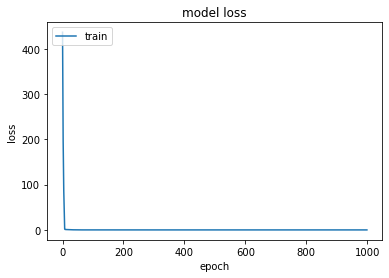

In [18]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
### Creating testing data ###

#c = 5 # Damping constant
#k = 6 # Stiffness of the spring
#m = 40 # Mass
F2 = randint(1,10)  #Different force for testing


testvals = sim.generate(c,k,m,F2,x0=0.1) ## Generating testing data##


list_t2 = list(zip(testvals[0], testvals[1], testvals[2]))
dframe2 = pd.DataFrame(list_t2, columns=['Time',"Speed", 'Position'])

print (dframe2)

Y2 = dframe2["Position"].iloc[1:]
X2 = dframe2.head(-1)
#test_data = np.array([10])
#test1 = model.predict(X[:1])

         Time     Speed  Position
0     0.00000  0.000000  0.100000
1     0.06006  0.023282  0.100701
2     0.12012  0.046277  0.102791
3     0.18018  0.068982  0.106254
4     0.24024  0.091390  0.111071
..        ...       ...       ...
995  59.75976 -0.002617  3.996717
996  59.81982 -0.002566  3.996562
997  59.87988 -0.002514  3.996409
998  59.93994 -0.002462  3.996260
999  60.00000 -0.002410  3.996113

[1000 rows x 3 columns]


999/999 [==============================] - 0s 376us/step
2.2139340203495438e-07


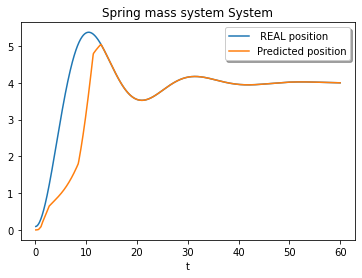

In [20]:
#### Test ####

results = model.evaluate(X, Y, batch_size=128)

print(results)

y_pred = []

for row in X2.itertuples(): ## Iterates trough 
    xr = model.predict(np.array([[row.Time, row.Speed, row.Position]])) 
    y_pred.append(float(xr[0]))


plt.plot(dframe2["Time"].iloc[1:], Y2)
plt.plot(dframe2["Time"].iloc[1:], y_pred)
#plt.plot(testvals[0], predictions_x)
plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('Spring mass system System')
plt.show()

In [12]:
keras.backend.clear_session() ## To start over again